# Sports Central Pvt Ltd. : Target High Value Customer finding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Transactions Dataset

In [2]:
na_value = ["$", "%", "*", "/","?", "#", "+", "", " ","n/a"]
#importing transactions dataset
df_trans = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", na_values = na_value, sheet_name = "transactions_p")

In [3]:
df_trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19798,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-21
19799,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1997-05-10
19800,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-20
19801,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-17


In [4]:
#handling missing values
print((df_trans.isnull().sum()/df_trans.count())*100)
df_trans.dropna(inplace = True)

transaction_id             0.00000
product_id                 0.00000
customer_id                0.00000
transaction_date           0.00000
online_order               1.84109
order_status               0.00000
brand                      0.00000
product_line               0.00000
product_class              0.00000
product_size               0.00000
list_price                 0.00000
standard_cost              0.00000
product_first_sold_date    0.00000
dtype: float64


In [5]:
(df_trans.isnull().sum()/df_trans.count())*100

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

In [6]:
#checking duplicates
df_trans.duplicated().sum()

0

In [7]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19802
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [8]:
#new column as profit
df_trans["profit"] = df_trans["list_price"] - df_trans["standard_cost"]
df_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82


### Customers Demographic Dataset

In [9]:
#importing customer demographic data set
df_customer_demo = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",na_values = na_value,sheet_name = "customer_demographic_p")
df_customer_demo

C:\Users\bibek\AppData\Local\Temp\ipykernel_7080\2499148713.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_customer_demo = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",na_values = na_value,sheet_name = "customer_demographic_p")


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [10]:
#checking missing values percentage
(df_customer_demo.isnull().sum()/df_customer_demo.count())*100

customer_id                             0.000000
first_name                              0.000000
last_name                               3.225806
gender                                  0.000000
past_3_years_bike_related_purchases     0.000000
DOB                                     2.223358
job_title                              14.481969
job_industry_category                  19.617225
wealth_segment                          0.000000
deceased_indicator                      0.000000
default                                 8.166577
owns_car                                0.000000
tenure                                  2.223358
dtype: float64

In [11]:
#more information of data
df_customer_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [12]:
#replaceing missing categorical columns to mode of that columns
for i in df_customer_demo.columns:
    if df_customer_demo[i].dtype == object:
        if df_customer_demo[i].isnull().any():
            df_customer_demo[i].fillna(df_customer_demo[i].mode()[0], inplace = True)

Data was having some missing values in categorical columns having range between 8% - 20%,so replaced that with the mode values.

In [13]:
#checking missing values
(df_customer_demo.isnull().sum()/df_customer_demo.count())*100
#droping other missingvalues
df_customer_demo.dropna(inplace = True)

In [14]:
(df_customer_demo.isnull().sum()/df_customer_demo.count())*100

customer_id                            0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
DOB                                    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
default                                0.0
owns_car                               0.0
tenure                                 0.0
dtype: float64

In [15]:
#checking for duplicates
df_customer_demo.duplicated().sum()

0

In [16]:
#correcting the values in gender column
df_customer_demo["gender"].unique()
replace_value = { "F" : "Female","Femal":"Female", "M": "Male", "U":"Others"}
df_customer_demo["gender"].replace(replace_value, inplace = True)
df_customer_demo["gender"].unique()

array(['Female', 'Male', 'Others'], dtype=object)

The gender column was having some inconsistency in the data, sloved them by replacing them, now it's clean.

In [17]:
#new columns as age
import datetime
current_year = datetime.datetime.now().year
df_customer_demo["age"] = current_year - df_customer_demo["DOB"].apply(lambda x: x.year)

Featured new column as Age.

In [18]:
#droping the DOB column as there is no need of that now
df_customer_demo.drop("DOB", axis = 1, inplace = True)
df_customer_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,70
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,43
2,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,69
3,4,Talbot,Pristnor,Male,33,Business Systems Development Analyst,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,62
4,5,Sheila-kathryn,Calton,Female,56,Senior Editor,Manufacturing,Affluent Customer,N,NIL,Yes,8.0,46


### Customers Adress Dataset

In [19]:
#importing the customers adress dataset
df_customer_add = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", na_values = na_value, sheet_name = "customer_adress_p")
df_customer_add

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [20]:
#checking for missing values
print(f"missing values :-{df_customer_add.isnull().sum()}")
print("-------------------------------------------------------")
#checking for duplicates
print(f"duplicates:-{df_customer_add.duplicated().sum()}")
#checking datatypes and more informations
print("-------------------------------------------------------")
print(df_customer_add.info())

missing values :-customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64
-------------------------------------------------------
duplicates:-0
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB
None


Looks like this dataset is pretty much clean.

### Mergeing all the dataset

In [21]:
#mergering all the dataset in df_merged variable
df_merged = pd.merge(df_trans, df_customer_demo, on = "customer_id",how = "inner")
df_merged = pd.merge(df_merged, df_customer_add, on = "customer_id", how = "inner")
df_merged

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,default,owns_car,tenure,age,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,68,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,68,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,68,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,44,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,44,4 Shopko Circle,2196,NSW,Australia,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18981,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,...,N,â¦testâ§,Yes,20.0,68,1 Wayridge Park,4301,QLD,Australia,1
18982,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,N,Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌ...,No,22.0,47,88 Rutledge Crossing,4215,QLD,Australia,7
18983,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,N,Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌ...,No,22.0,47,88 Rutledge Crossing,4215,QLD,Australia,7
18984,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,N,Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌ...,No,22.0,47,88 Rutledge Crossing,4215,QLD,Australia,7


### RFM Analysis(Receny, Frequency, Monitary)

In [22]:
#getting the most recent transaction
date_sorted = df_merged.sort_values(by = "transaction_date", ascending = False)
recent_trans = date_sorted.loc[751,"transaction_date"]
print(f"Most recent transaction date is{recent_trans}.")
# new feature as receny
df_merged["Recency"] = recent_trans - df_merged["transaction_date"]
df_merged.head(2)
#conveting the receny column from datetime to int
df_merged["Recency"] = df_merged["Recency"].dt.days
df_merged.head(2)

Most recent transaction date is2017-12-30 00:00:00.


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,default,owns_car,tenure,age,address,postcode,state,country,property_valuation,Recency
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,68,984 Hoepker Court,3064,VIC,Australia,6,308
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,68,984 Hoepker Court,3064,VIC,Australia,6,75


In [23]:
#group the data by customerid
group_data = df_merged.groupby(["customer_id"], as_index = False).agg(
    product_count = pd.NamedAgg(column = "product_id",aggfunc = "count"),
    min_receny = pd.NamedAgg(column = "Recency",aggfunc = "min"),
    total_profit = pd.NamedAgg(column = "profit",aggfunc = "sum"))
group_data

,customer_id,product_count,min_receny,total_profit
0,1,11,7,3018.09
1,2,3,128,2226.26
2,4,2,195,220.57
3,5,6,16,2394.94
4,6,5,64,3946.55
...,...,...,...,...
3406,3496,4,256,2045.84
3407,3497,3,52,1648.32
3408,3498,6,127,3147.33
3409,3499,7,51,4955.25


In [24]:
group_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    3411 non-null   int64  
 1   product_count  3411 non-null   int64  
 2   min_receny     3411 non-null   int64  
 3   total_profit   3411 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 106.7 KB


In [25]:
d1 = group_data.describe()
d1

,customer_id,product_count,min_receny,total_profit
count,3411.000000,3411.000000,3411.000000,3411.000000
mean,1749.819408,5.566110,62.733509,3063.274503
std,1009.201272,2.291118,59.312104,1748.306130
min,1.000000,1.000000,0.000000,15.080000
25%,876.500000,4.000000,18.000000,1795.650000
50%,1749.000000,5.000000,45.000000,2789.250000
75%,2621.500000,7.000000,87.500000,4104.120000
max,3500.000000,14.000000,353.000000,11668.950000


In [26]:
#defining function to calcute r score with the help of five number summary
def calculate_r_score(min_receny):
    if min_receny >= 88:
        return 1
    elif 87 >= min_receny > 45:
        return 2
    elif 45 >= min_receny > 18:
        return 3
    elif 18 >= min_receny > 0:
        return 4
    else:
        return None

In [27]:
#applying the function and creating new column for r score
group_data["r_score"] = group_data["min_receny"].apply(calculate_r_score)
group_data

,customer_id,product_count,min_receny,total_profit,r_score
0,1,11,7,3018.09,4.0
1,2,3,128,2226.26,1.0
2,4,2,195,220.57,1.0
3,5,6,16,2394.94,4.0
4,6,5,64,3946.55,2.0
...,...,...,...,...,...
3406,3496,4,256,2045.84,1.0
3407,3497,3,52,1648.32,2.0
3408,3498,6,127,3147.33,1.0
3409,3499,7,51,4955.25,2.0


In [28]:
d1

,customer_id,product_count,min_receny,total_profit
count,3411.000000,3411.000000,3411.000000,3411.000000
mean,1749.819408,5.566110,62.733509,3063.274503
std,1009.201272,2.291118,59.312104,1748.306130
min,1.000000,1.000000,0.000000,15.080000
25%,876.500000,4.000000,18.000000,1795.650000
50%,1749.000000,5.000000,45.000000,2789.250000
75%,2621.500000,7.000000,87.500000,4104.120000
max,3500.000000,14.000000,353.000000,11668.950000


In [29]:
#function for f_score parameters from five number summary
def calculate_f_score(product_count):
    if product_count >= 7:
        return 4
    elif 6 >= product_count > 5:
        return 3
    elif 5 >= product_count > 4:
        return 2
    elif 4 >= product_count > 1:
        return 1
    else:
        return None

In [30]:
#new column f_score
group_data["f_score"] = group_data["product_count"].apply(calculate_f_score)
group_data

,customer_id,product_count,min_receny,total_profit,r_score,f_score
0,1,11,7,3018.09,4.0,4.0
1,2,3,128,2226.26,1.0,1.0
2,4,2,195,220.57,1.0,1.0
3,5,6,16,2394.94,4.0,3.0
4,6,5,64,3946.55,2.0,2.0
...,...,...,...,...,...,...
3406,3496,4,256,2045.84,1.0,1.0
3407,3497,3,52,1648.32,2.0,1.0
3408,3498,6,127,3147.33,1.0,3.0
3409,3499,7,51,4955.25,2.0,4.0


In [31]:
#function for m_score using five number summary
def calculate_m_score(total_profit):
    if total_profit >= 4104:
        return 4
    elif 4104 >= total_profit > 2789:
        return 3
    elif 2789 >= total_profit > 1796:
        return 2
    elif 1796 >= total_profit > 15:
        return 1
    else:
        return None

In [32]:
#new column m_score
group_data["m_score"] = group_data["total_profit"].apply(calculate_m_score)
group_data

,customer_id,product_count,min_receny,total_profit,r_score,f_score,m_score
0,1,11,7,3018.09,4.0,4.0,3
1,2,3,128,2226.26,1.0,1.0,2
2,4,2,195,220.57,1.0,1.0,1
3,5,6,16,2394.94,4.0,3.0,2
4,6,5,64,3946.55,2.0,2.0,3
...,...,...,...,...,...,...,...
3406,3496,4,256,2045.84,1.0,1.0,2
3407,3497,3,52,1648.32,2.0,1.0,1
3408,3498,6,127,3147.33,1.0,3.0,3
3409,3499,7,51,4955.25,2.0,4.0,4


In [33]:
#calculating and creating column rfm value
group_data["RFM_value"] = (100*group_data["r_score"])+(10*group_data["f_score"])+group_data["m_score"]
group_data

,customer_id,product_count,min_receny,total_profit,r_score,f_score,m_score,RFM_value
0,1,11,7,3018.09,4.0,4.0,3,443.0
1,2,3,128,2226.26,1.0,1.0,2,112.0
2,4,2,195,220.57,1.0,1.0,1,111.0
3,5,6,16,2394.94,4.0,3.0,2,432.0
4,6,5,64,3946.55,2.0,2.0,3,223.0
...,...,...,...,...,...,...,...,...
3406,3496,4,256,2045.84,1.0,1.0,2,112.0
3407,3497,3,52,1648.32,2.0,1.0,1,211.0
3408,3498,6,127,3147.33,1.0,3.0,3,133.0
3409,3499,7,51,4955.25,2.0,4.0,4,244.0


In [34]:
#creating customer profile based on five numbers summary of RFM_value
group_data.describe()
#function for customer profile
def calculate_customer_profile(RFM_value):
    if RFM_value >= 411:
        return "Platinum"
    elif 410 >= RFM_value > 311:
        return "Gold"
    elif 311 >= RFM_value > 211:
        return "Silver"
    elif 211 >= RFM_value >= 111:
        return "Bronze"
    else:
        return None
#applying and creating column customer profile
group_data["customer_profile"] = group_data["RFM_value"].apply(calculate_customer_profile)
group_data

,customer_id,product_count,min_receny,total_profit,r_score,f_score,m_score,RFM_value,customer_profile
0,1,11,7,3018.09,4.0,4.0,3,443.0,Platinum
1,2,3,128,2226.26,1.0,1.0,2,112.0,Bronze
2,4,2,195,220.57,1.0,1.0,1,111.0,Bronze
3,5,6,16,2394.94,4.0,3.0,2,432.0,Platinum
4,6,5,64,3946.55,2.0,2.0,3,223.0,Silver
...,...,...,...,...,...,...,...,...,...
3406,3496,4,256,2045.84,1.0,1.0,2,112.0,Bronze
3407,3497,3,52,1648.32,2.0,1.0,1,211.0,Bronze
3408,3498,6,127,3147.33,1.0,3.0,3,133.0,Bronze
3409,3499,7,51,4955.25,2.0,4.0,4,244.0,Silver


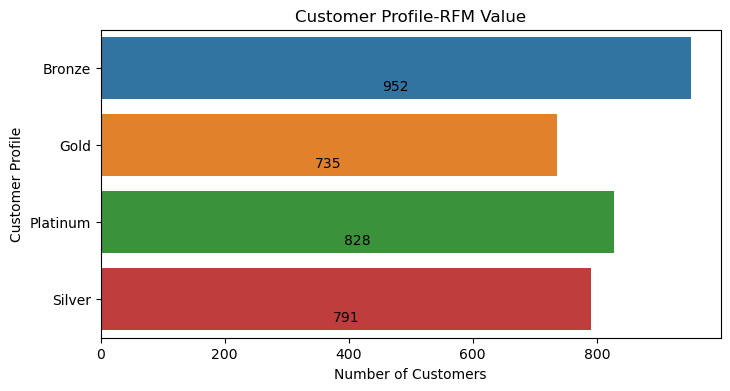

In [35]:
#creating a barplot to visualise which type of customer we have more
plt.figure(figsize = (8,4))
ax = sns.barplot(x = "RFM_value",
           y = "customer_profile",
           data = group_data.groupby(["customer_profile"], as_index = False)["RFM_value"].count())
#showing the values in the chart
for p in ax.patches:
    ax.annotate(format(p.get_width(), ".0f"), 
                (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()), 
                ha = "center", va = "center", 
                xytext = (0, 9), 
                textcoords = "offset points",
                fontsize=10)
#giving labels
plt.title("Customer Profile-RFM Value")
plt.xlabel("Number of Customers")
plt.ylabel("Customer Profile")
plt.show()

1. Most Of The Customers are Bronze Customers (952), also Platinum Customers (828) are more as they are 
   the second higest. 
2. There are least number of Customers in Gold segment (735). 

In [36]:
#craeting bins for age
df_merged["age"].describe()

#using the five numbers summary to creat bins
age_bin_edges = [18, 36, 46, 55, 93]
age_bin_labels = ["18-35", "36-45", "46-54", "55-92"]
age_bins = pd.cut(df_merged["age"], bins=age_bin_edges, labels=age_bin_labels, include_lowest=True)

# Adding the age bins as a new column to the DataFrame
df_merged["agebin"] = age_bins
df_merged.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,owns_car,tenure,age,address,postcode,state,country,property_valuation,Recency,agebin
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Yes,10.0,68,984 Hoepker Court,3064,VIC,Australia,6,308,55-92
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Yes,10.0,68,984 Hoepker Court,3064,VIC,Australia,6,75,55-92
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Yes,10.0,68,984 Hoepker Court,3064,VIC,Australia,6,248,55-92
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Yes,10.0,44,4 Shopko Circle,2196,NSW,Australia,5,223,36-45
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Yes,10.0,44,4 Shopko Circle,2196,NSW,Australia,5,86,36-45


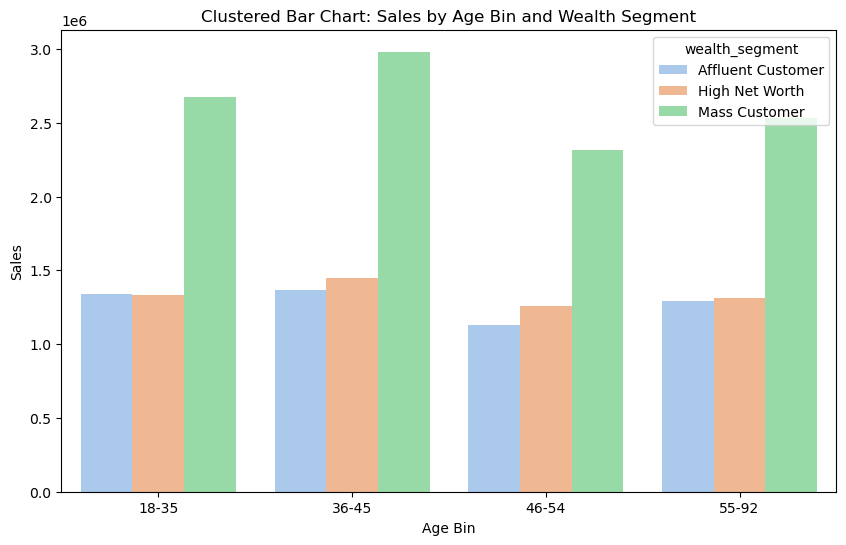

In [37]:
#creating a pivot table for age vs wealth-segment on the basis of total profits
age_vs_wealth_pivot = df_merged.pivot_table(values = "list_price",
                                            index = "agebin", 
                                            columns = "wealth_segment", 
                                            aggfunc = "sum")
#reseting the index for ploting
age_vs_wealth_pivot.reset_index(inplace = True)

# Melting the DataFrame for easier Seaborn plotting
melted_data = pd.melt(age_vs_wealth_pivot, 
                      id_vars=["agebin"], 
                      value_vars=["Affluent Customer","High Net Worth","Mass Customer"], 
                      value_name="Sales")
# Createing a clustered bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")

ax1 =sns.barplot(data=melted_data, 
            x="agebin", 
            y="Sales", 
            hue="wealth_segment")

plt.title("Clustered Bar Chart: Sales by Age Bin and Wealth Segment")
plt.xlabel("Age Bin")
plt.ylabel("Sales")
plt.show()

1. People whose age are between 36 to 45 and are Mass Customer are the most sales giving customers.  
2. In all the age category Mass Customers are giving the highest sales. 
3. Affluent customers are the least sales givving customers.

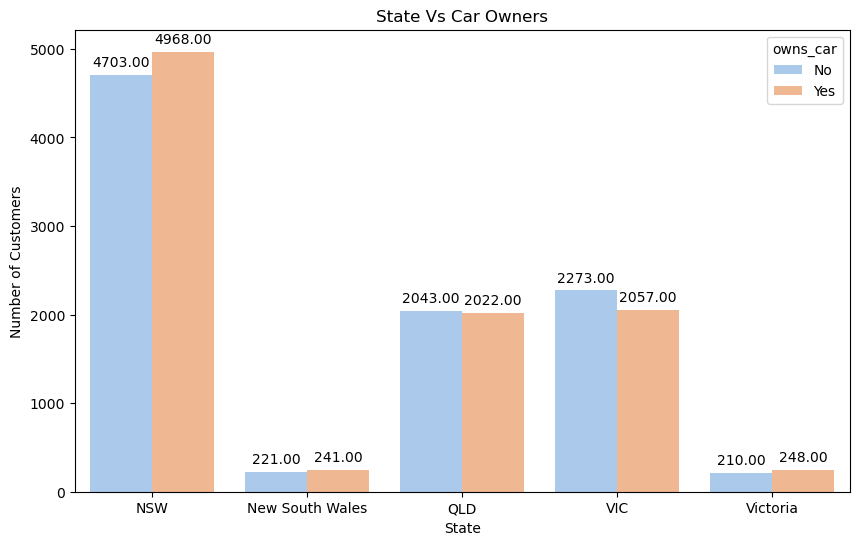

In [38]:
# Createing a clustered bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")

ax1 =sns.barplot(x="state", 
                 y="customer_id", 
                 hue="owns_car",
                data=df_merged.groupby(["state", "owns_car"], as_index = False)["customer_id"].count())
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=10)

plt.title("State Vs Car Owners")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.show()

1. There are highest number of car owners (4968) as well as highest number of custoemrs who does not owns a car (1704) in   NSW State.  
    i. Most of the cutomers are from NSW state.
2. We can say the ratio of car owner and non car owners is approximatly 50/50.

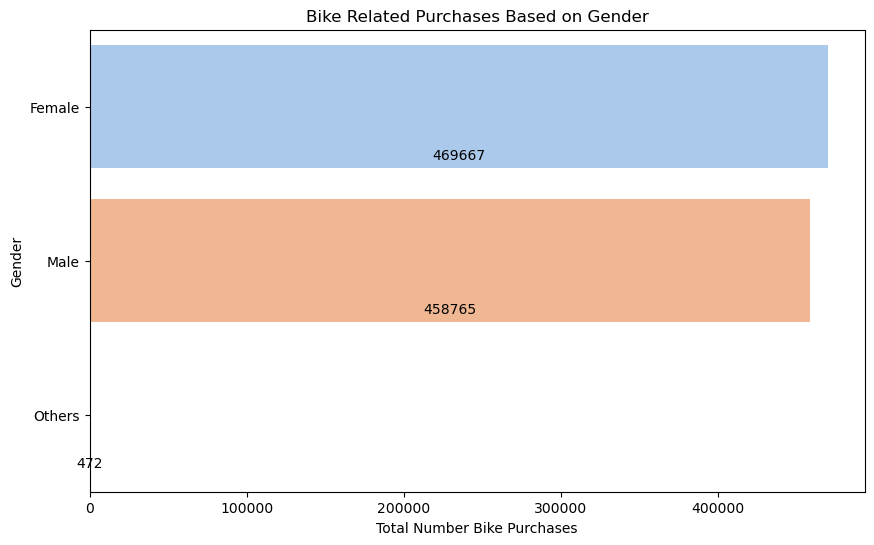

In [39]:
#creating a bar chart to display bike related purchases based on gender
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")

ax1 =sns.barplot(x="past_3_years_bike_related_purchases", 
                 y="gender",
                data=df_merged.groupby(["gender"], as_index = False)["past_3_years_bike_related_purchases"].sum())
for p in ax1.patches:
    ax1.annotate(format(p.get_width(), ".0f"), 
                (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()), 
                ha = "center", va = "center", 
                xytext = (0, 9), 
                textcoords = "offset points",
                fontsize=10)
plt.title("Bike Related Purchases Based on Gender")
plt.xlabel("Total Number Bike Purchases")
plt.ylabel("Gender")
plt.show()

Females are purchasing bikes (469667) more than male (458765), but they are close to each other.

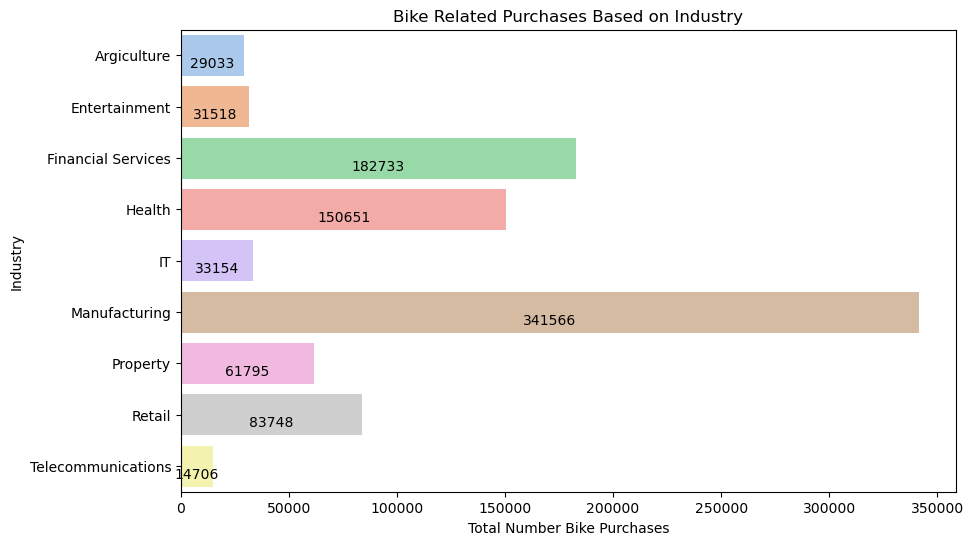

In [40]:
#creating a bar chart to display bike related purchases based on industry
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")

ax1 =sns.barplot(x="past_3_years_bike_related_purchases", 
                 y="job_industry_category",
                data=df_merged.groupby(["job_industry_category"], as_index = False)["past_3_years_bike_related_purchases"].sum())
for p in ax1.patches:
    ax1.annotate(format(p.get_width(), ".0f"), 
                (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()), 
                ha = "center", va = "center", 
                xytext = (0, 9), 
                textcoords = "offset points",
                fontsize=10)
plt.title("Bike Related Purchases Based on Industry")
plt.xlabel("Total Number Bike Purchases")
plt.ylabel("Industry")
plt.show()

1. Manufacturing industry has the highest number of Bike purchases (341566). 
2. Financial services (182733) and Health (150651) industry are also purchasing bikes in good numbers.
3. Telecommunications industry People are purchasing least number of bikes (14706) compare to other industries.

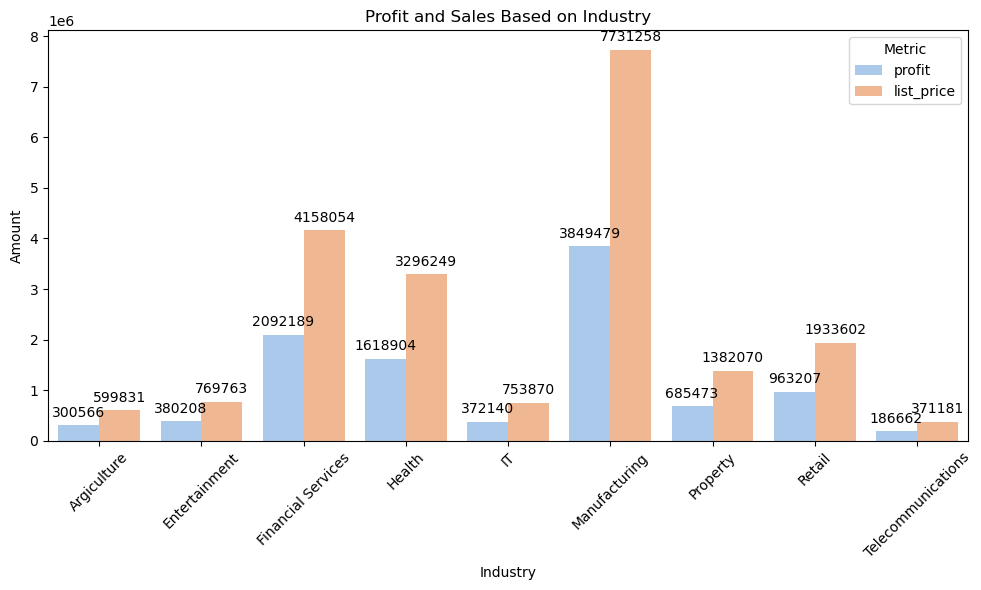

In [41]:
## Craeting a Cluster plot to show the sales and profit based on indusrty
# Group by "job_industry_category" and sum the metrics
grouped_data = df_merged.groupby(["job_industry_category"], as_index = False)[["profit", "list_price"]].sum()
# Melting the DataFrame for Seaborn plotting
melted_data = pd.melt(grouped_data, 
                      id_vars=["job_industry_category"], 
                      value_vars=["profit", "list_price"], 
                      var_name="Metric", value_name="Amount")
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
# Createing the clustered bar plot using Seaborn
ax = sns.barplot(x="job_industry_category",
                 y="Amount",
                 hue="Metric",
                 data=melted_data)
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="center", 
                xytext=(0, 9), 
                textcoords="offset points",
                fontsize=10)
# Adding labels and title
plt.title("Profit and Sales Based on Industry")
plt.xlabel("Industry")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout() 
plt.show()

This cinario is same as bike related purchaes based on industry.
1. Manufaturing are giving highest sales (7731258) as well as profit (3849479) followed by Financial services and Helath (.
2. Telecommunications are giving least sales (371181) as well as profit (186662).

In [42]:
#saving the cleaned and joined data as a excel file
df_merged.to_excel("Full_Sports_Central_data.xlsx")

## Statistical Analysis

In [43]:
#droping the unnessery columns
df_merged.drop(["customer_id","transaction_id", "product_id", "transaction_date", "product_first_sold_date",
               "address","age", "default", "postcode"],axis = 1 ,inplace = True)

<Axes: >

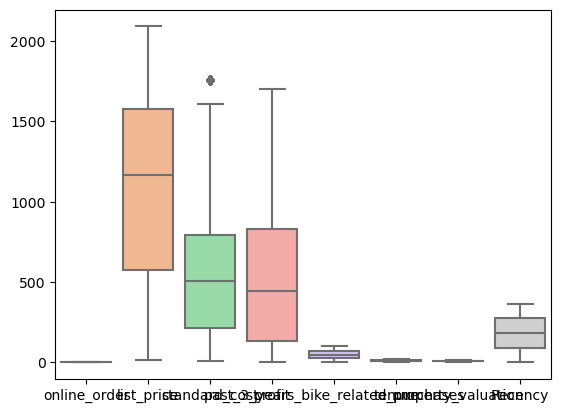

In [44]:
#checking for outliers
sns.boxplot(df_merged)

Here very few outliers are existing, so we need to replace them.

In [45]:
#creating a function that will replace all the outliers from a column if exists
def replace_outliers(column):
    q1 = column.quantile(.25)
    q3 = column.quantile(.75)
    
    iqr = q3 - q1
    
    upper_tile = q3 + (1.5*iqr)
    lower_tile = q1 - (1.5*iqr)
    
    column[column > upper_tile] = upper_tile
    column[column < lower_tile] = lower_tile
    
    return column

In [46]:
# replacing the outliers using a for loop and the previouly created function
for i in df_merged.columns:
    if df_merged[i].dtype in ["int64", "int32","float" ,"float64", "float32", "float"]:
         df_merged[i] = replace_outliers(df_merged[i])

C:\Users\bibek\AppData\Local\Temp\ipykernel_7080\1389424655.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > upper_tile] = upper_tile
C:\Users\bibek\AppData\Local\Temp\ipykernel_7080\1389424655.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < lower_tile] = lower_tile
C:\Users\bibek\AppData\Local\Temp\ipykernel_7080\1389424655.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > up

<Axes: >

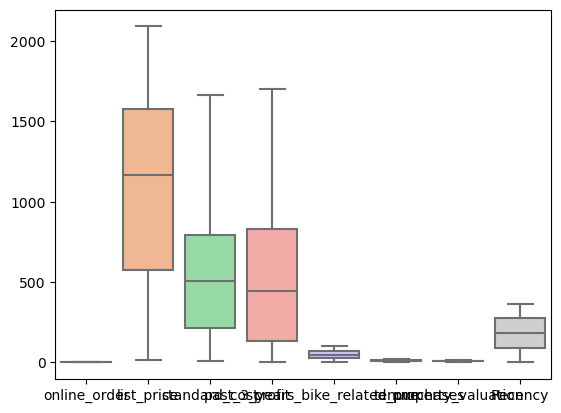

In [47]:
#checking again if the treatment has sucessfully done or not
sns.boxplot(df_merged)

Now there is no outliers present so we are good to go.

In [48]:
#importing label encoder to encode the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#creating a copy of the dataset to encode in that
labeled_df = df_merged.copy()

#encoding the categorical columns
for i in labeled_df.columns:
    if labeled_df[i].dtype == "object":
        labeled_df[i] = le.fit_transform(labeled_df[i])
labeled_df

,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,first_name,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,country,property_valuation,Recency,agebin
0,0.0,0,3,2,2,1,71.49,53.62,17.87,1546,...,2,2,0,1,10.0,3,0,6,308,55-92
1,0.0,0,0,2,2,1,1403.50,954.82,448.68,1546,...,2,2,0,1,10.0,3,0,6,75,55-92
2,0.0,0,3,2,2,1,478.16,298.72,179.44,1546,...,2,2,0,1,10.0,3,0,6,248,55-92
3,1.0,0,4,2,2,0,2091.47,388.92,1702.55,1573,...,3,2,0,1,10.0,0,0,5,223,36-45
4,0.0,0,0,2,0,1,1129.13,677.48,451.65,1573,...,3,2,0,1,10.0,0,0,5,86,36-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18981,0.0,0,2,2,0,1,227.88,136.73,91.15,393,...,2,2,0,1,20.0,2,0,1,180,55-92
18982,1.0,0,3,2,2,1,441.49,84.99,356.50,1401,...,3,0,0,0,22.0,2,0,7,312,46-54
18983,0.0,0,3,3,2,0,2083.94,675.03,1408.91,1401,...,3,0,0,0,22.0,2,0,7,263,46-54
18984,0.0,0,4,2,2,0,2091.47,388.92,1702.55,1401,...,3,0,0,0,22.0,2,0,7,210,46-54


C:\Users\bibek\AppData\Local\Temp\ipykernel_7080\2690112190.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = labeled_df.corr(), annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)


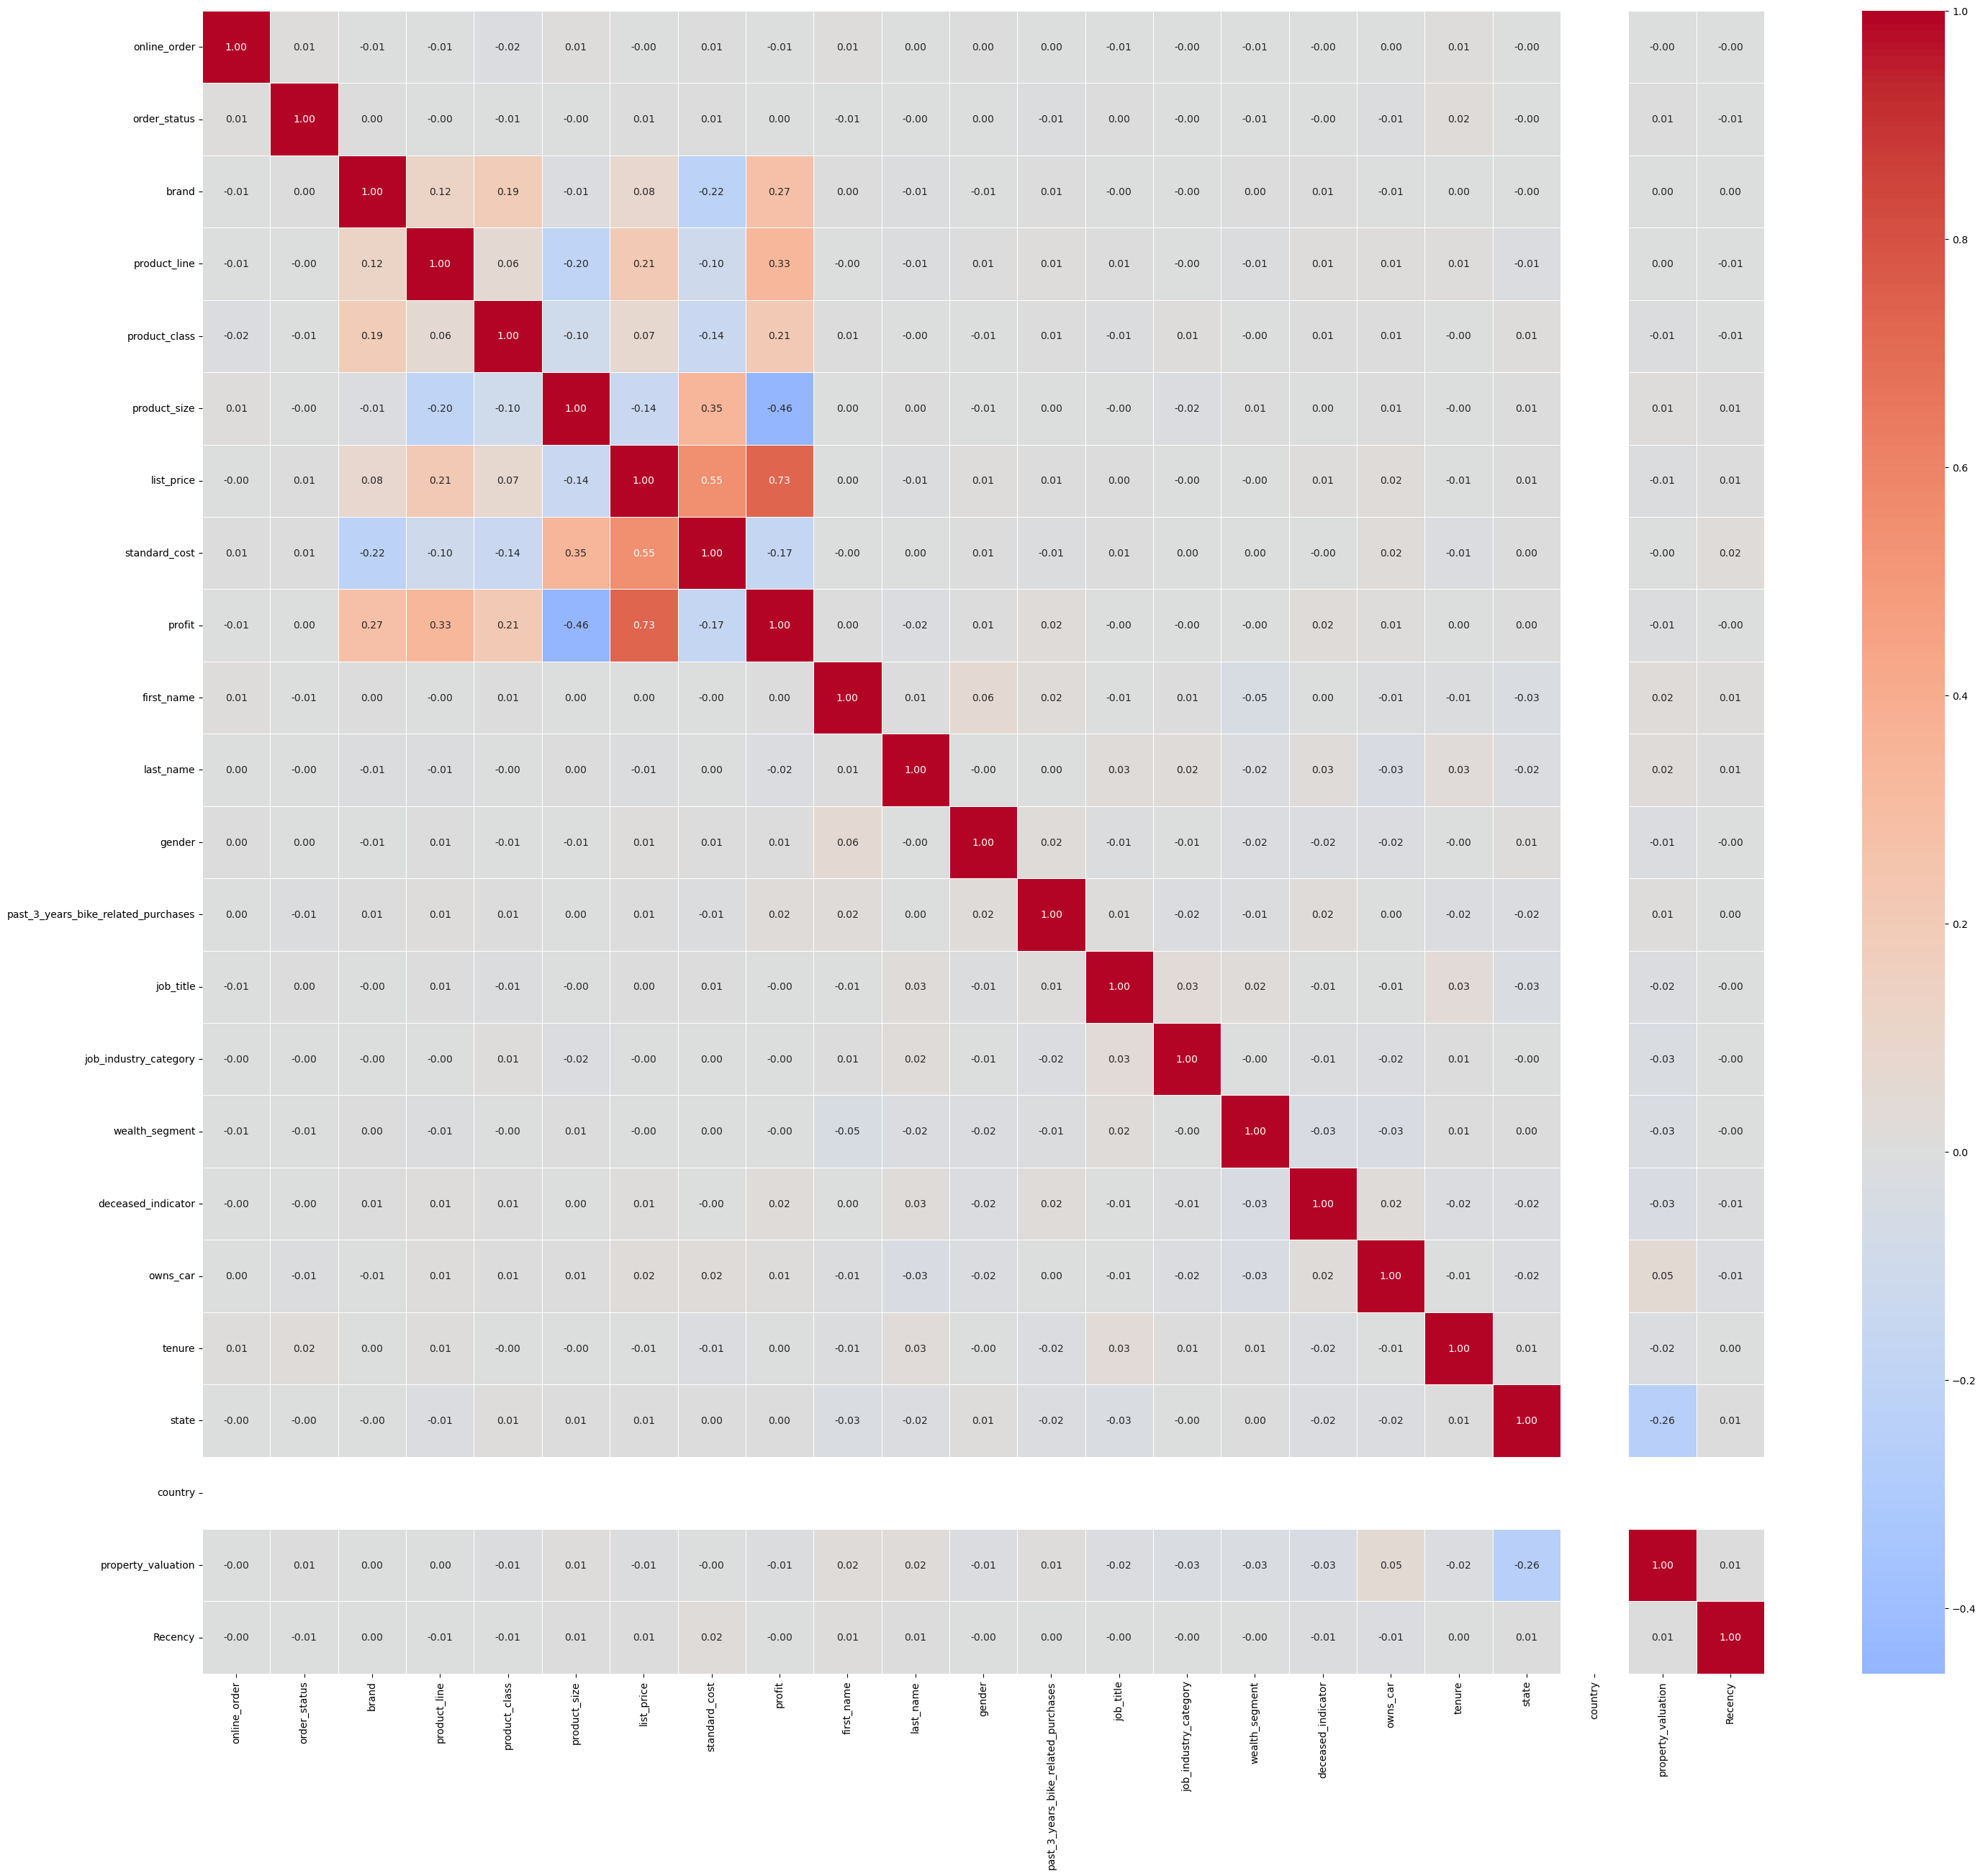

In [49]:
#ploting a heatmap to checking the varibale realtion using correlation matrix
plt.figure(figsize=(35,30))
sns.heatmap(data = labeled_df.corr(), annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.show()

No Such Significant correlation between our depend variable list_price(sales) with other variables so, there is no point to make a regression model.
So going with the charts that represent the category of customers who were significant.

# Thank You